In [3]:
import tarfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sys import ps2
import seaborn as sns
from utils import *

In [91]:
tools = ['hlahd','arcas','phlat','rna2hla','seq2hla','hlaforest','hlavbseq']
my_order=["HLA-HD","arcasHLA","PHLAT","RNA2HLA","seq2HLA","HLAforest","HLA-vbseq"]

sns.set_context("paper")
sns.set(font_scale=1.5)
sns.set_style("white")

# All RL on SRR samples only

In [116]:
# rls = [36,51,76]
rls = [36,51,76,101,126]
gs = pd.read_csv('../datasets/readlength_gs_SRRonly.csv')

data = []

for tool in tools:
    for rl in rls:
        filepath = f'../results/read_length/standard/{tool}_{str(rl)}.csv'
        pre = pd.read_csv(filepath)
        ret = np.array(get_accuracy_counts(pre,gs))
        ret = ret[:3] # comment out this line to consider no-call
        total = sum(sum(ret))      

        # add 
        data.append([tool,rl,sum(ret[1])/total+sum(ret[2])/total,sum(ret[2])/total] ) # not considering classes (not enough data).. so sum it


    

In [117]:
# get means
shortest1, short1, med1, long1, longest1 = 0,0,0,0,0
shortest2, short2, med2, long2, longest2 = 0,0,0,0,0

# shortest1, short1, med1  = 0,0,0
# shortest2, short2, med2 = 0,0,0

tot = 8 # change to total # tools

for d in data:
    if d[1] == 36:
        shortest1 += d[2]/tot
        shortest2 += d[3]/tot
    if d[1] == 51:
        short1 += d[2]/tot
        short2 += d[3]/tot
    if d[1] == 76:
        med1 += d[2]/tot
        med2 += d[3]/tot
    if d[1] == 101:
        long1 += d[2]/tot
        long2 += d[3]/tot
    if d[1] == 126:
        longest1 += d[2]/tot
        longest2 += d[3]/tot

In [118]:
df = pd.DataFrame(data,columns=['tool','read length','one field accuracy','two field accuracy'])
print(df)


         tool  read length  one field accuracy  two field accuracy
0       hlahd           36            0.900000            0.400000
1       hlahd           51            0.833333            0.583333
2       hlahd           76            0.833333            0.500000
3       hlahd          101            0.833333            0.666667
4       hlahd          126            0.833333            0.666667
5       arcas           36            0.875000            0.750000
6       arcas           51            0.900000            0.800000
7       arcas           76            0.900000            0.800000
8       arcas          101            0.900000            0.800000
9       arcas          126            0.900000            0.800000
10      phlat           36            0.428571            0.285714
11      phlat           51            0.583333            0.250000
12      phlat           76            0.500000            0.416667
13      phlat          101            0.600000            0.50

(0.0, 1.0)

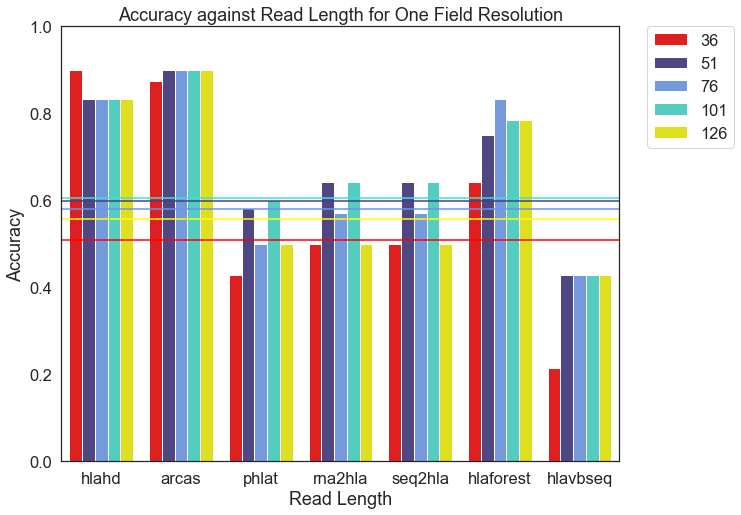

In [119]:
plt.figure(figsize=(10,8))

ax=sns.barplot(x = "tool", y = "one field accuracy", data=df,hue="read length",palette=['red','darkslateblue','cornflowerblue','turquoise','yellow'])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Read Length")
ax.set_title("Accuracy against Read Length for One Field Resolution") 

plt.axhline(y=shortest1, color='red', linestyle='-')
plt.axhline(y=short1, color='darkslateblue', linestyle='-')
plt.axhline(y=med1, color='cornflowerblue', linestyle='-')
plt.axhline(y=long1, color='turquoise', linestyle='-')
plt.axhline(y=longest1, color='yellow', linestyle='-')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim((0,1))
#sns.despine()
#plt.savefig('../Figures/read_length_accuracy_2dig.png',bbox_inches ="tight",dpi=300)

(0.0, 1.0)

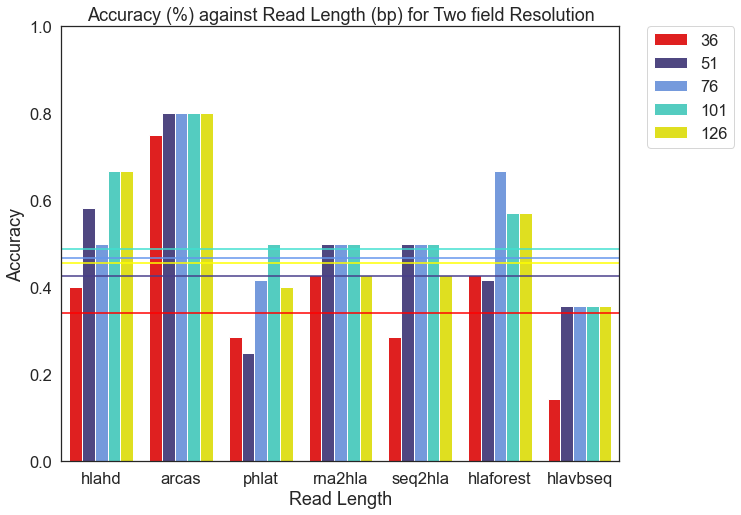

In [120]:
plt.figure(figsize=(10,8))

ax=sns.barplot(x = "tool", y = "two field accuracy", data=df,hue="read length",palette=['red','darkslateblue','cornflowerblue','turquoise','yellow'])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Read Length")
ax.set_title("Accuracy (%) against Read Length (bp) for Two field Resolution") 

# annotate mean lines
plt.axhline(y=shortest2, color='red', linestyle='-')
plt.axhline(y=short2, color='darkslateblue', linestyle='-')
plt.axhline(y=med2, color='cornflowerblue', linestyle='-')
plt.axhline(y=long2, color='turquoise', linestyle='-')
plt.axhline(y=longest2, color='yellow', linestyle='-')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim((0,1))
#sns.despine()
#plt.savefig('../Figures/read_length_accuracy_4dig.png',bbox_inches ="tight",dpi=300)

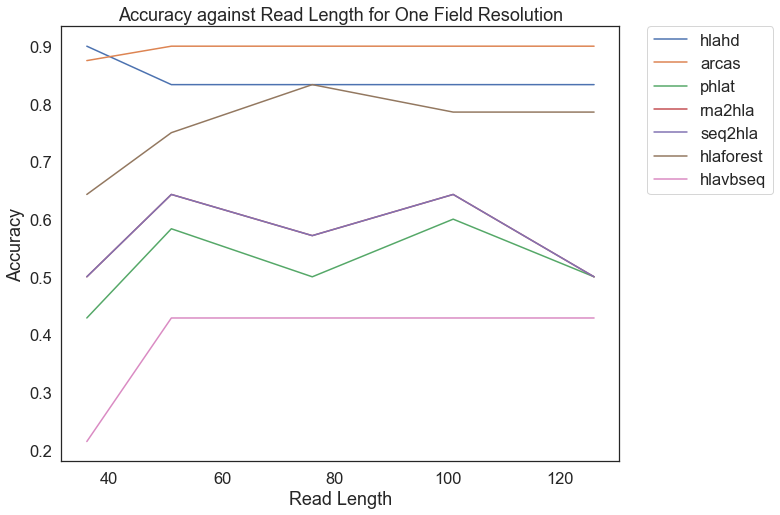

In [97]:
plt.figure(figsize=(10,8))

ax=sns.lineplot(x = "read length", y = "one field accuracy", data=df,hue="tool")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Read Length")
ax.set_title("Accuracy against Read Length for One Field Resolution") 

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#sns.despine()
#plt.savefig('../Figures/read_length_accuracy_2dig.png',bbox_inches ="tight",dpi=300)

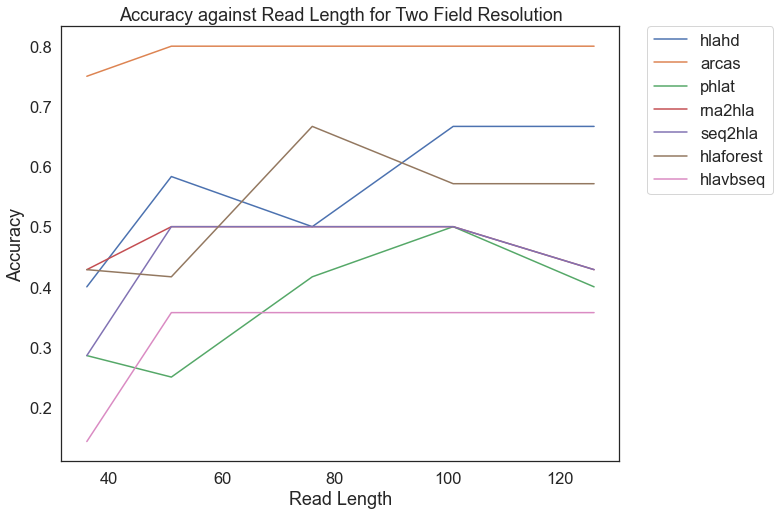

In [98]:
plt.figure(figsize=(10,8))

ax=sns.lineplot(x = "read length", y = "two field accuracy", data=df,hue="tool")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Read Length")
ax.set_title("Accuracy against Read Length for Two Field Resolution") 

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#sns.despine()
#plt.savefig('../Figures/read_length_accuracy_2dig.png',bbox_inches ="tight",dpi=300)

# ALL samples on 36,51,76 RL only


In [107]:
rls = [36,51,76]
gs = pd.read_csv('../datasets/readlength_gs.csv')

data = []

for tool in tools:
    for rl in rls:
        filepath = f'../results/read_length/standard/{tool}_{str(rl)}.csv'
        pre = pd.read_csv(filepath)
        ret = np.array(get_accuracy_counts(pre,gs))
        ret = ret[:3] # comment out this line to consider no-call
        total = sum(sum(ret))      

        # add 
        data.append([tool,rl,sum(ret[1])/total+sum(ret[2])/total,sum(ret[2])/total] ) # not considering classes (not enough data).. so sum it


    

In [108]:
# get means


shortest1, short1, med1  = 0,0,0
shortest2, short2, med2 = 0,0,0

tot = 8 # change to total # tools

for d in data:
    if d[1] == 36:
        shortest1 += d[2]/tot
        shortest2 += d[3]/tot
    if d[1] == 51:
        short1 += d[2]/tot
        short2 += d[3]/tot
    if d[1] == 76:
        med1 += d[2]/tot
        med2 += d[3]/tot

df = pd.DataFrame(data,columns=['tool','read length','one field accuracy','two field accuracy'])
print(df)


         tool  read length  one field accuracy  two field accuracy
0       hlahd           36            0.960000            0.580000
1       hlahd           51            0.961538            0.865385
2       hlahd           76            0.961538            0.884615
3       arcas           36            0.958333            0.708333
4       arcas           51            0.960000            0.840000
5       arcas           76            0.980000            0.960000
6       phlat           36            0.851852            0.611111
7       phlat           51            0.807692            0.711538
8       phlat           76            0.884615            0.865385
9     rna2hla           36            0.760870            0.630435
10    rna2hla           51            0.847826            0.739130
11    rna2hla           76            0.847826            0.804348
12    seq2hla           36            0.777778            0.518519
13    seq2hla           51            0.851852            0.68

(0.0, 1.0)

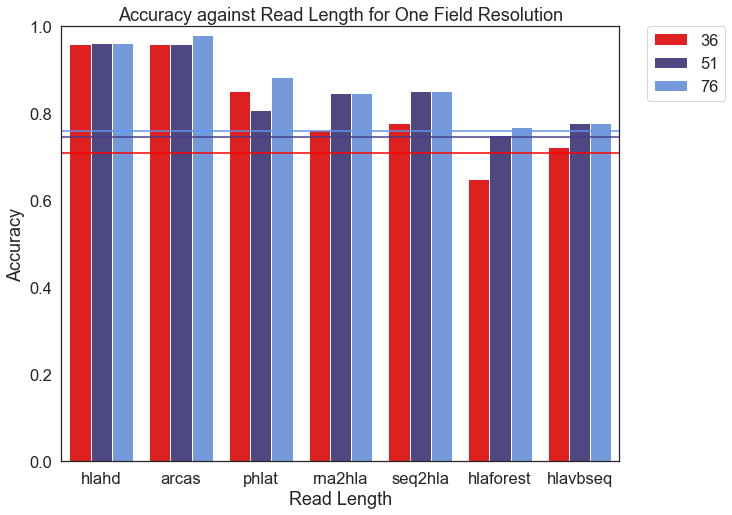

In [109]:
plt.figure(figsize=(10,8))

ax=sns.barplot(x = "tool", y = "one field accuracy", data=df,hue="read length",palette=['red','darkslateblue','cornflowerblue'])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Read Length")
ax.set_title("Accuracy against Read Length for One Field Resolution") 

plt.axhline(y=shortest1, color='red', linestyle='-')
plt.axhline(y=short1, color='darkslateblue', linestyle='-')
plt.axhline(y=med1, color='cornflowerblue', linestyle='-')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim((0,1))
#sns.despine()
#plt.savefig('../Figures/read_length_accuracy_2dig.png',bbox_inches ="tight",dpi=300)

(0.0, 1.0)

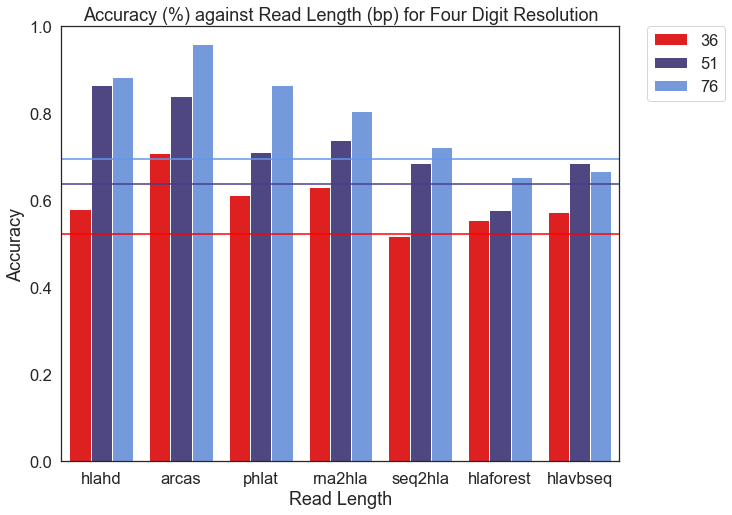

In [110]:
plt.figure(figsize=(10,8))

ax=sns.barplot(x = "tool", y = "two field accuracy", data=df,hue="read length",palette=['red','darkslateblue','cornflowerblue','turquoise','yellow'])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Read Length")
ax.set_title("Accuracy (%) against Read Length (bp) for Two field Resolution") 

# annotate mean lines
plt.axhline(y=shortest2, color='red', linestyle='-')
plt.axhline(y=short2, color='darkslateblue', linestyle='-')
plt.axhline(y=med2, color='cornflowerblue', linestyle='-')



plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim((0,1))
#sns.despine()
#plt.savefig('../Figures/read_length_accuracy_4dig.png',bbox_inches ="tight",dpi=300)

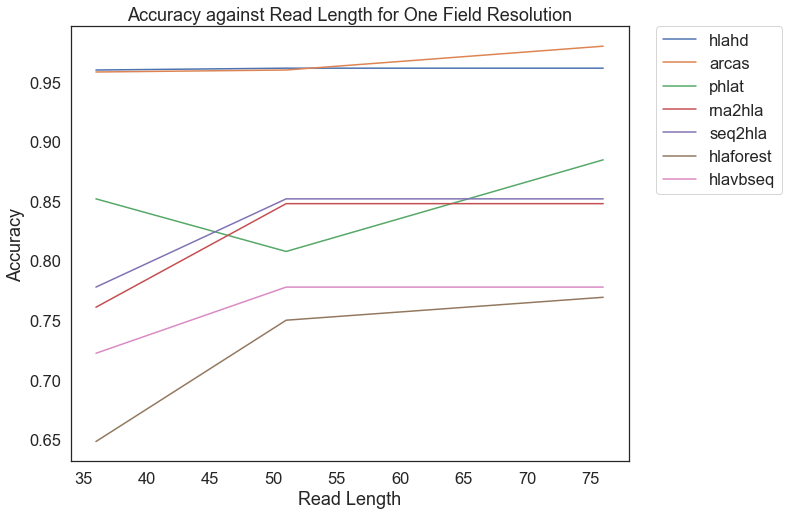

In [111]:
plt.figure(figsize=(10,8))

ax=sns.lineplot(x = "read length", y = "one field accuracy", data=df,hue="tool")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Read Length")
ax.set_title("Accuracy against Read Length for One Field Resolution") 

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#sns.despine()
#plt.savefig('../Figures/read_length_accuracy_2dig.png',bbox_inches ="tight",dpi=300)

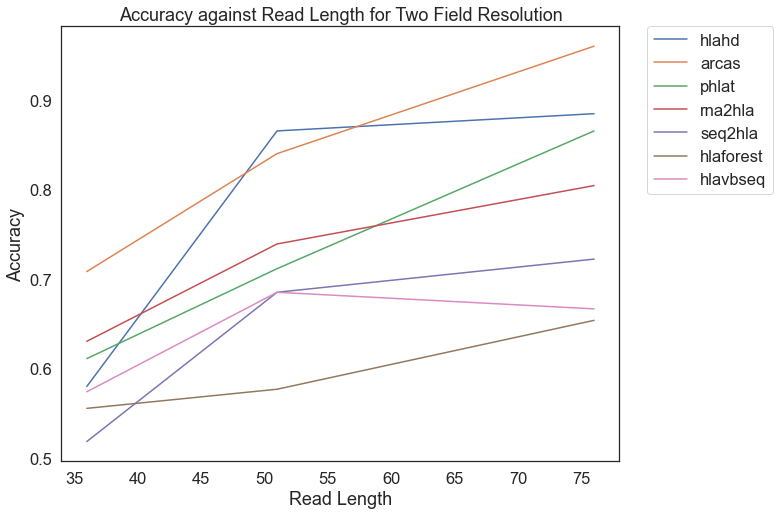

In [112]:
plt.figure(figsize=(10,8))

ax=sns.lineplot(x = "read length", y = "two field accuracy", data=df,hue="tool")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Read Length")
ax.set_title("Accuracy against Read Length for Two Field Resolution") 

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#sns.despine()
#plt.savefig('../Figures/read_length_accuracy_2dig.png',bbox_inches ="tight",dpi=300)